Esta primeira atividade faremos um detector da frequencia fundamental (Pitch) para notas de guitarra.

Vamos utilizar o dataset https://www.kaggle.com/juliancienfuegos/what-is-a-note

Será útil para aprender a carregar e manipular arquivos de áudio, e também extraír algumas features.

Matrial de consulta: https://musicinformationretrieval.com/index.html

In [144]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [145]:
from google.colab import drive

drive.mount('/content/gdrive/')
#dir = 'gdrive/My Drive/UEA/2021/Turma 1/Audio dataset/Guitar notes/archive'
dir = 'gdrive/My Drive/machine_learning_aplicado_2/Audio dataset/Guitar notes/archive'

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).



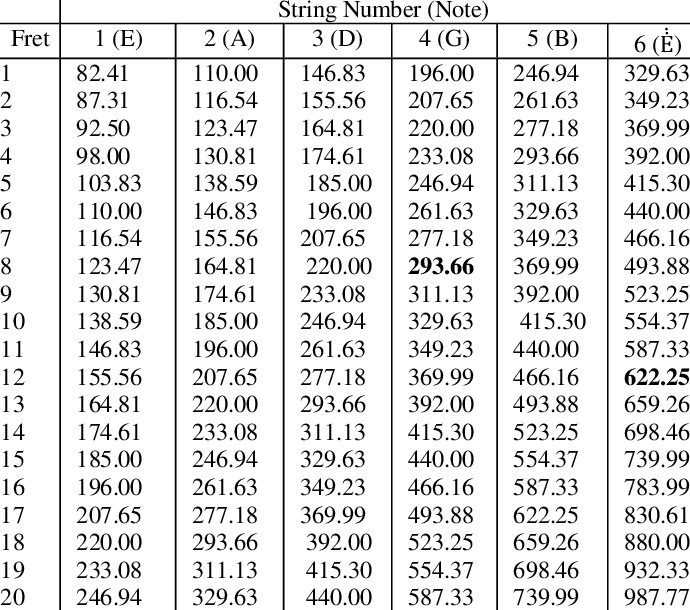

In [146]:
notes_freqs= {'Elo0':82.41,'Elo1':87.31,'Elo2':92.50,'Elo3':98.00,'Elo4':103.83,'Elo5':110,'Elo6':116.54,'Elo7':123.47,'Elo8':130.81,
              'A0':110,'A1':116.54,'A2':123.47,'A3':130.81,'A4':138.59,'A5':146.83,'A6':155.56,'A7':164.81,'A8':174.61,
              'D0':146.83,'D1':155.56,'D2':164.81,'D3':174.61,'D4':185,'D5':196,'D6':207.65,'D7':220,'D8':233.08,
              'G0':196,'G1':207.65,'G2':220,'G3':233.08,'G4':246.94,'G5':261.63,'G6':277.18,'G7':293.66,'G8':311.13,
              'B0':246.94,'B1':261.63,'B2':277.18,'B3':293.66,'B4':311.13,'B5':329.63,'B6':349.23,'B7':369.99,'B8':392,
              'Ehi0':329.63,'Ehi1':349.23,'Ehi2':369.99,'Ehi3':392,'Ehi4':415.30,'Ehi5':440,'Ehi6':466.16,'Ehi7':493.88,'Ehi8':523.25}

minFr = 75
maxFr = 530

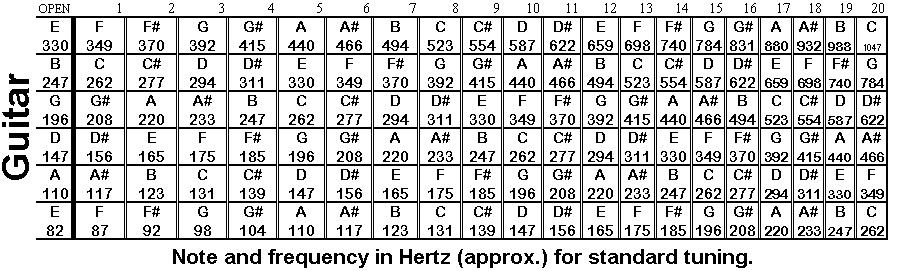

In [147]:
notes_codes= {'Elo0':'Elo','Elo1':'F','Elo2':'F#','Elo3':'G','Elo4':'G#','Elo5':'A','Elo6':'A#','Elo7':'B','Elo8':'C',
              'A0':'A','A1':'A#','A2':'B','A3':'C','A4':'C#','A5':'D','A6':'D#','A7':'E','A8':'F',
              'D0':'D','D1':'D#','D2':'E','D3':'F','D4':'F#','D5':'G','D6':'G#','D7':'A','D8':'A#',
              'G0':'G','G1':'G#','G2':'A','G3':'A#','G4':'B','G5':'C','G6':'C#','G7':'D','G8':'D#',
              'B0':'B','B1':'C','B2':'C#','B3':'D','B4':'D#','B5':'E','B6':'F','B7':'F#','B8':'G',
              'Ehi0':'Ehi','Ehi1':'F','Ehi2':'F#','Ehi3':'G','Ehi4':'G#','Ehi5':'A','Ehi6':'A#','Ehi7':'B','Ehi8':'C'}

In [148]:
import os
import re

# Load the list of wav files
files = [f for f in os.listdir(dir) if f.endswith('.wav')]
files.sort()

# # We also define a dataframe containing the filenames, we will use this later
df_files = pd.DataFrame(files)
df_files.columns = ['File']

df_test = df_files[0:8]
df_train = df_files.loc[8:]
df_train = df_train.reset_index(drop=True)

df_train['Label'] = ""
df_train['String'] = ""
df_train['Freq'] = ""

for index, row in df_train.iterrows():
    chord_freq = row['File'].split('.') 
    df_train['Label'][index] = chord_freq[0]
    df_train['String'][index] = str(chord_freq[0].rstrip('0123456789'))
    df_train['Freq'][index] = notes_freqs[chord_freq[0]]

df_train['Freq'] = df_train['Freq'].astype(float)
df_train

File Label String    Freq
0     A0.wav    A0      A  110.00
1     A1.wav    A1      A  116.54
2     A2.wav    A2      A  123.47
3     A3.wav    A3      A  130.81
4     A4.wav    A4      A  138.59
5     A5.wav    A5      A  146.83
6     A6.wav    A6      A  155.56
7     A7.wav    A7      A  164.81
8     A8.wav    A8      A  174.61
9     B0.wav    B0      B  246.94
10    B1.wav    B1      B  261.63
11    B2.wav    B2      B  277.18
12    B3.wav    B3      B  293.66
13    B4.wav    B4      B  311.13
14    B5.wav    B5      B  329.63
15    B6.wav    B6      B  349.23
16    B7.wav    B7      B  369.99
17    B8.wav    B8      B  392.00
18    D0.wav    D0      D  146.83
19    D1.wav    D1      D  155.56
20    D2.wav    D2      D  164.81
21    D3.wav    D3      D  174.61
22    D4.wav    D4      D  185.00
23    D5.wav    D5      D  196.00
24    D6.wav    D6      D  207.65
25    D7.wav    D7      D  220.00
26    D8.wav    D8      D  233.08
27  Ehi0.wav  Ehi0    Ehi  329.63
28  Ehi1.wav  Ehi1    Ehi  349.23
29  Ehi2.wav  Ehi2    Ehi  369.99
30  Ehi3.wav  Ehi3    Ehi  392.00
31  Ehi4.wav  Ehi4    Ehi  415.30
32  Ehi5.wav  Ehi5    Ehi  440.00
33  Ehi6.wav  Ehi6    Ehi  466.16
34  Ehi7.wav  Ehi7    Ehi  493.88
35  Ehi8.wav  Ehi8    Ehi  523.25
36  Elo0.wav  Elo0    Elo   82.41
37  Elo1.wav  Elo1    Elo   87.31
38  Elo2.wav  Elo2    Elo   92.50
39  Elo3.wav  Elo3    Elo   98.00
40  Elo4.wav  Elo4    Elo  103.83
41  Elo5.wav  Elo5    Elo  110.00
42  Elo6.wav  Elo6    Elo  116.54
43  Elo7.wav  Elo7    Elo  123.47
44  Elo8.wav  Elo8    Elo  130.81
45    G0.wav    G0      G  196.00
46    G1.wav    G1      G  207.65
47    G2.wav    G2      G  220.00
48    G3.wav    G3      G  233.08
49    G4.wav    G4      G  246.94
50    G5.wav    G5      G  261.63
51    G6.wav    G6      G  277.18
52    G7.wav    G7      G  293.66
53    G8.wav    G8      G  311.13

## Carregando um arquivo de áudio em um vetor

In [149]:
import librosa
import librosa.display

nota = 2 # testar 0 e 2

x, sr = librosa.load(dir + '/' + df_train['File'][nota])
print(sr)
print(len(x)/sr)


# normalizando e removendo o offset
x = (x - np.mean(x))/np.std(x)
n = len(x)

22050
2.6006349206349206


## Visualizando a série de tempo

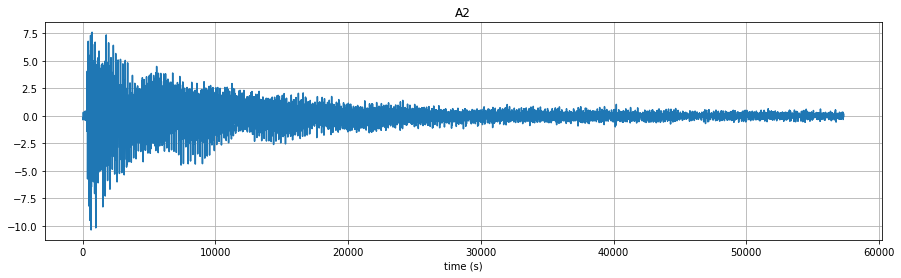

In [150]:
plt.figure(figsize=(15,4))
plt.plot(x ,'-')
plt.title(df_train['Label'][nota]);
plt.xlabel('time (s)')
# plt.xlim([5080, 5100]);
# plt.ylim([-5,5])
plt.grid()

## Visulizando um áudio e seu espectro de frequências

A FFT de um sinal discreto é:

$f_k = \sum_{n=0}^{N-1} x_n ~ e^{-2\pi j \frac{kn}{N}}$

a inversa do espectro de frequencias é:

$x_n = \frac{1}{N} \sum_{k=0}^{N-1} f_k ~ e^{2\pi j \frac{kn}{N}}$

In [151]:
# Espectro de freqências
spectrum = np.abs(librosa.stft(x, n_fft=n, center=False))
freqs = librosa.fft_frequencies(sr=sr, n_fft=n)

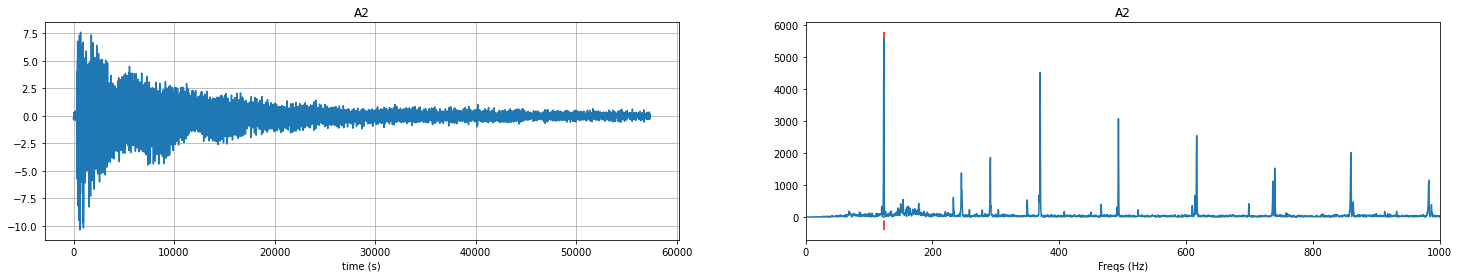

In [152]:
plt.figure(figsize=(25,4))
plt.subplot(1,2,1)
plt.plot(x)
plt.title(df_train['Label'][nota]);
plt.xlabel('time (s)')
# plt.xlim([0, 1000]);
plt.grid()

plt.subplot(1,2,2)
plt.plot(freqs, spectrum)
plt.xlabel('Freqs (Hz)')
plt.title(df_train['Label'][nota]);
plt.vlines(df_train['Freq'][nota], -400, np.max(spectrum)+200, colors='red',linestyles='-.')
plt.xlim([0, 1e3]);

## Playing um áudio

In [153]:
import IPython.display as ipd

ipd.Audio(dir + '/' + df_train['File'][nota])

## Extraíndo algumas features dos áudios

Spectral centroid:

$f_c = \frac{\sum_k S(k)f(k)}{\sum_k S(k)}$

where $S(k)$ is the spectral magnitude at frequency bin $k$ and $f(k)$ is the frequency at bin $k$.

----

Spectral bandwidth:

B = $\Big(\sum_k S(k) \big( f(k) - f_c \big)^2 \Big)^{(1/2)}$

----

Autocorrelação:

$R_{xx} = \frac{1}{r} \sum_{n=1}^{N-r} x_n x_{n+r}; ~~~ r=\{0,1,2, \dots, (N-r)/2\}$

----

Pitch:

$\text{Pitch} = \underset{r}{\text{max}} ~ R_{xx}$

## Variação do spectral centroid

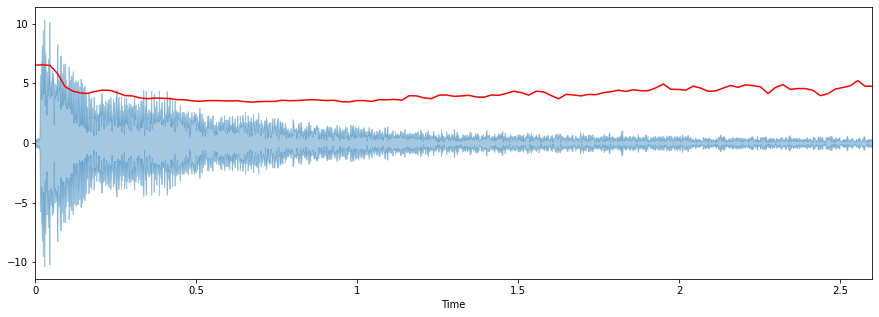

In [154]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr, n_fft=2048)[0]

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

plt.figure(figsize=(15,5))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, 0.005*spectral_centroids, color='r'); # normalize for visualization purposes

## Variação do Pitch

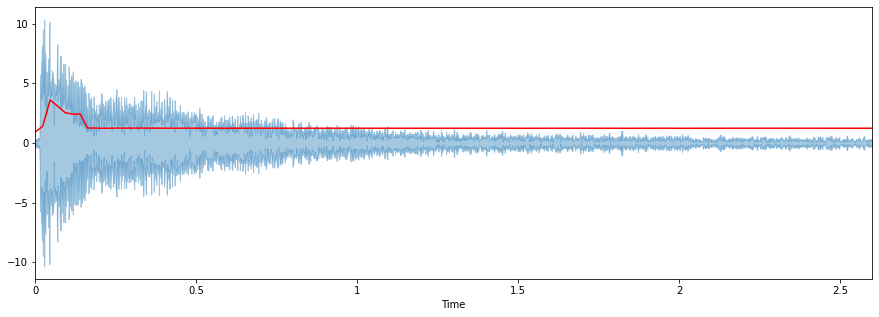

In [155]:
pitches = librosa.yin(x, minFr, maxFr, sr=sr, frame_length=512 )

frames = range(len(pitches))
t = librosa.frames_to_time(frames)

plt.figure(figsize=(15,5))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, 0.01*pitches, color='r'); # normalize for visualization purposes

## Extração de features para todas as notas

In [156]:
def extract_features(x, fs, filter=False):
    if filter:
        filter_len = 5
        x = np.convolve(x, np.ones(filter_len)/filter_len, mode='same')

    spectrum = np.abs(librosa.stft(x, n_fft = n, center = False))
    freqs = librosa.fft_frequencies(sr = sr, n_fft = n)

    zero_crossings = sum(librosa.zero_crossings(x, pad=False))
    zc_pitch = (zero_crossings*fs)/(2*n)

    cent = librosa.feature.spectral_centroid(x, sr=fs, S=spectrum)[0][0]
    bandwidth = librosa.feature.spectral_bandwidth(x, sr=fs, S=spectrum)[0][0]
    max_freq = freqs[np.argmax(spectrum)]
    pitch = librosa.yin(x, minFr, maxFr, sr=fs, frame_length=n, center=False)[0]

    return zc_pitch, cent, bandwidth, max_freq, pitch

In [157]:
from tqdm.notebook import tqdm

for newcol in ['N','sr','zc_pitch','cent','bandwidth','max_freq','pitch']:
    df_train[newcol] = 0.0

X_train = []

for index, row in tqdm(df_train.iterrows()):
    y, sr = librosa.load(dir + '/' + row['File'])
    y = (y - np.mean(y))/np.std(y)
    n = len(y)

    zc_pitch, cent, bandwidth, max_freq, pitch = extract_features(y, sr, filter=True)

    df_train.loc[index, ['N']] = n
    df_train.loc[index, ['sr']] = sr
    df_train.loc[index,['zc_pitch']] = zc_pitch
    df_train.loc[index,['cent']] = cent
    df_train.loc[index,['bandwidth']] = bandwidth
    df_train.loc[index,['max_freq']] = max_freq
    df_train.loc[index,['pitch']] = pitch

In [158]:
df_train

File Label String  ...   bandwidth    max_freq       pitch
0     A0.wav    A0      A  ...  617.818334  218.613281  108.954861
1     A1.wav    A1      A  ...  780.307701  349.826300  116.749998
2     A2.wav    A2      A  ...  764.310326  123.431396  123.267952
3     A3.wav    A3      A  ...  796.952185  130.123391  130.578354
4     A4.wav    A4      A  ...  751.818005  137.812500  138.181046
5     A5.wav    A5      A  ...  761.886937  146.234375  146.517374
6     A6.wav    A6      A  ...  666.408162  155.039062  155.668862
7     A7.wav    A7      A  ...  634.473634  164.083008  164.817953
8     A8.wav    A8      A  ...  623.128440  173.513927  174.483375
9     B0.wav    B0      B  ...  847.504433  491.380635  243.717603
10    B1.wav    B1      B  ...  765.244691  522.653906  261.474201
11    B2.wav    B2      B  ...  820.469642  552.941895   92.473707
12    B3.wav    B3      B  ...  798.613891  878.921210   97.801461
13    B4.wav    B4      B  ...  801.876275  309.998740  310.550807
14    B5.wav    B5      B  ...  784.918684  328.279776  109.643179
15    B6.wav    B6      B  ...  811.032902  347.818762  348.642406
16    B7.wav    B7      B  ...  838.567975  368.686577  185.042283
17    B8.wav    B8      B  ...  769.394860  390.323378  391.133507
18    D0.wav    D0      D  ...  646.982933  146.175603  146.489933
19    D1.wav    D1      D  ...  655.469239  155.039062  155.709914
20    D2.wav    D2      D  ...  600.442275  164.435369  164.824924
21    D3.wav    D3      D  ...  612.463647  173.638259  174.149860
22    D4.wav    D4      D  ...  683.303428  369.682031  185.732430
23    D5.wav    D5      D  ...  632.490884  392.039483  196.091270
24    D6.wav    D6      D  ...  693.073359  414.768307  207.973851
25    D7.wav    D7      D  ...  617.574524  220.434686  220.403239
26    D8.wav    D8      D  ...  656.653528  233.381922  233.174612
27  Ehi0.wav  Ehi0    Ehi  ...  888.814064  327.369449  109.108531
28  Ehi1.wav  Ehi1    Ehi  ...  824.096024  347.796949  347.953217
29  Ehi2.wav  Ehi2    Ehi  ...  900.992922  368.169202  184.704291
30  Ehi3.wav  Ehi3    Ehi  ...  783.530540  389.648438  195.236307
31  Ehi4.wav  Ehi4    Ehi  ...  838.588970  413.209836  207.034610
32  Ehi5.wav  Ehi5    Ehi  ...  845.626666  877.235536  219.228190
33  Ehi6.wav  Ehi6    Ehi  ...  803.059665  927.238451  464.476455
34  Ehi7.wav  Ehi7    Ehi  ...  730.964261  490.582541  491.421206
35  Ehi8.wav  Ehi8    Ehi  ...  843.616665  519.841974  521.616715
36  Elo0.wav  Elo0    Elo  ...  599.147512  163.522821   82.006374
37  Elo1.wav  Elo1    Elo  ...  705.906472  173.954504   87.248604
38  Elo2.wav  Elo2    Elo  ...  688.026187  183.852999   92.977697
39  Elo3.wav  Elo3    Elo  ...  670.388135  488.490317   98.207318
40  Elo4.wav  Elo4    Elo  ...  652.325485  516.796875  208.373541
41  Elo5.wav  Elo5    Elo  ...  705.586111  219.992898  109.759114
42  Elo6.wav  Elo6    Elo  ...  714.044849  232.297585  116.256832
43  Elo7.wav  Elo7    Elo  ...  704.590047  369.299054  123.484405
44  Elo8.wav  Elo8    Elo  ...  715.446719  130.494449  131.449416
45    G0.wav    G0      G  ...  706.610039  390.089101  195.726694
46    G1.wav    G1      G  ...  787.707423  415.464154  208.994234
47    G2.wav    G2      G  ...  753.172123  220.243113  219.263498
48    G3.wav    G3      G  ...  808.110300  233.276367  233.596194
49    G4.wav    G4      G  ...  730.343376  492.799674  245.091329
50    G5.wav    G5      G  ...  741.713453  261.269531  261.364709
51    G6.wav    G6      G  ...  783.957728  276.550394   92.571440
52    G7.wav    G7      G  ...  845.592267  293.147297   98.007958
53    G8.wav    G8      G  ...  808.643436  310.600142  103.659447

[54 rows x 11 columns]

### Diferencas usando o Pitch e informando a corda e o traste apertado

In [159]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

enc = OneHotEncoder()
one_hot_strings = enc.fit_transform(df_train['String'].values.reshape(-1,1)).toarray()

norm = MinMaxScaler()
norm_freqs = norm.fit_transform(df_train['Freq'].values.reshape(-1,1))

X_train = np.concatenate((one_hot_strings,norm_freqs),axis=1)

knn = KNeighborsClassifier(n_neighbors=1)
neighbors = knn.fit(X_train, df_train['Label'].values)

In [160]:
pitch = norm.transform(df_train['pitch'].values.reshape(-1,1))
X_test = np.concatenate((one_hot_strings,pitch),axis=1)
y_pred = knn.predict(X_test)
y_pred

array(['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'B0', 'B1',
       'B0', 'B0', 'B4', 'B0', 'B6', 'B0', 'B8', 'D0', 'D1', 'D2', 'D3',
       'D4', 'D5', 'D6', 'D7', 'D8', 'Ehi0', 'Ehi1', 'Ehi0', 'Ehi0',
       'Ehi0', 'Ehi0', 'Ehi6', 'Ehi7', 'Ehi8', 'Elo0', 'Elo1', 'Elo2',
       'Elo3', 'Elo8', 'Elo5', 'Elo6', 'Elo7', 'Elo8', 'G0', 'G1', 'G2',
       'G3', 'G4', 'G5', 'G0', 'G0', 'G0'], dtype=object)

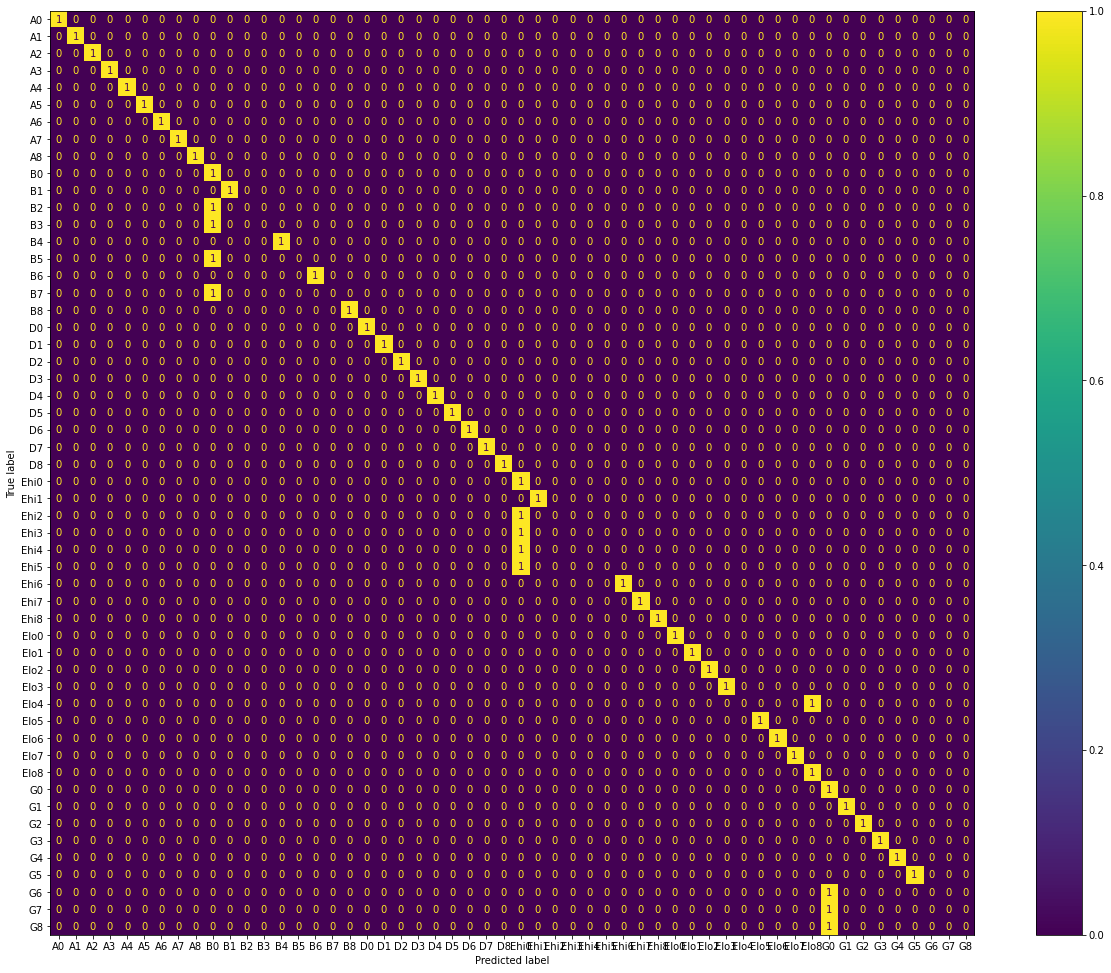

In [161]:
from sklearn.metrics import plot_confusion_matrix, classification_report

# print(classification_report(df_train['Label'].values, y_pred))

fig, ax = plt.subplots(figsize=(22, 17))
plot_confusion_matrix(knn, X_test, df_train['Label'].values, ax=ax )
plt.show()

### Diferença entre os pitchs

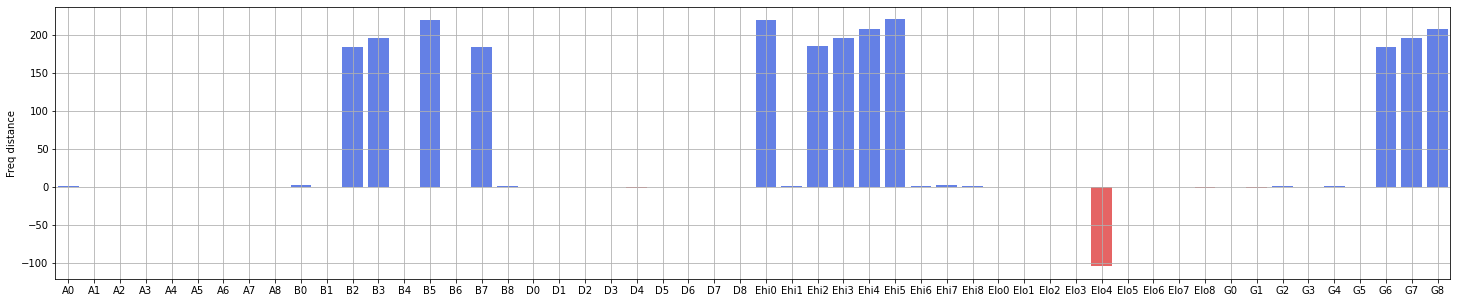

In [162]:
freq_pitch_diff = df_train['Freq'].values - df_train['pitch'].values

mask1 = freq_pitch_diff > 0.0
mask2 = freq_pitch_diff <= 0.0

y_pos = np.arange(len(df_train))

fig, ax = plt.subplots(figsize=(25,5))
ax.bar(y_pos[mask1], freq_pitch_diff[mask1], align='center', color='#6480e5')
ax.bar(y_pos[mask2], freq_pitch_diff[mask2], align='center', color='#e56464')

plt.xlim([-0.5,53.5])
ax.set_xticks(y_pos)
ax.set_xticklabels(df_train['Label'])
ax.set_ylabel('Freq distance')
plt.grid()
plt.show()

### Diferenças usando a frequencia com maior energia

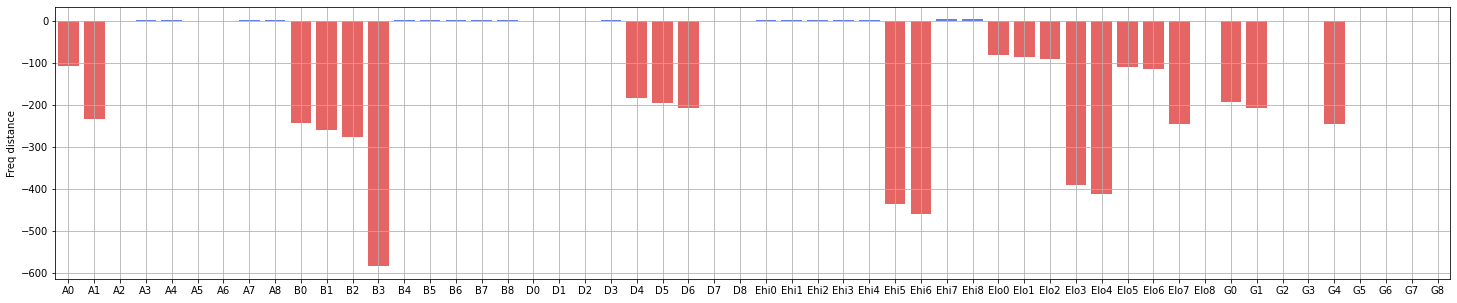

In [163]:
freq_pitch_diff = df_train['Freq'].values - df_train['max_freq'].values

mask1 = freq_pitch_diff > 0.0
mask2 = freq_pitch_diff <= 0.0

y_pos = np.arange(len(df_train))

fig, ax = plt.subplots(figsize=(25,5))
ax.bar(y_pos[mask1], freq_pitch_diff[mask1], align='center', color='#6480e5')
ax.bar(y_pos[mask2], freq_pitch_diff[mask2], align='center', color='#e56464')

plt.xlim([-0.5,53.5])
ax.set_xticks(y_pos)
ax.set_xticklabels(df_train['Label'])
ax.set_ylabel('Freq distance')
plt.grid()
plt.show()

Estimando a frequencia principal a partir do Zero-Crossing Rate

https://medium.com/the-seekers-project/algorithmic-frequency-pitch-detection-series-part-1-making-a-simple-pitch-tracker-using-zero-9991327897a4

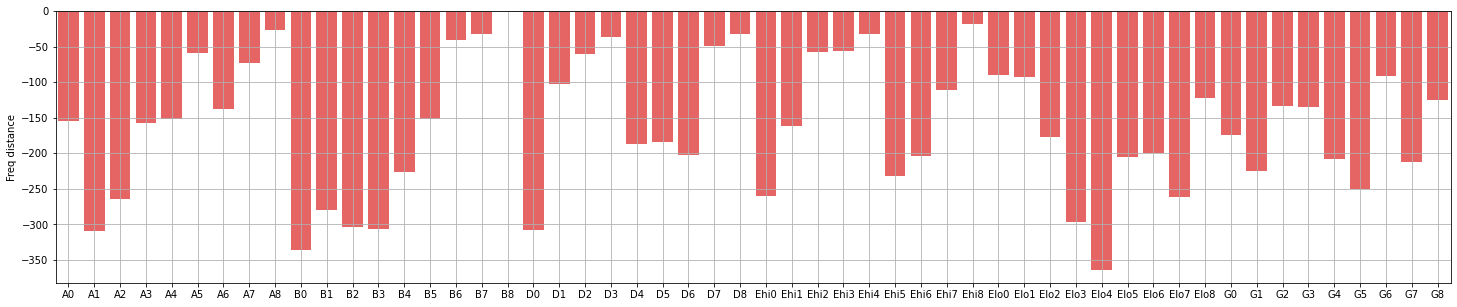

In [164]:
freq_pitch_diff = df_train['Freq'].values - df_train['zc_pitch'].values

mask1 = freq_pitch_diff > 0.0
mask2 = freq_pitch_diff <= 0.0

y_pos = np.arange(len(df_train))

fig, ax = plt.subplots(figsize=(25,5))
ax.bar(y_pos[mask1], freq_pitch_diff[mask1], align='center', color='#6480e5')
ax.bar(y_pos[mask2], freq_pitch_diff[mask2], align='center', color='#e56464')

plt.xlim([-0.5,53.5])
ax.set_xticks(y_pos)
ax.set_xticklabels(df_train['Label'])
ax.set_ylabel('Freq distance')
plt.grid()
plt.show()

### Agrupamentos das notas

In [165]:
from sklearn.cluster import KMeans

k = 6
kmeans = KMeans(n_clusters=k)

# X = df_train[['pitch']].values
X = df_train[['bandwidth']].values
# X = df_train[['zc_pitch', 'cent', 'bandwidth', 'max_freq', 'pitch']].values
kmeans.fit(X)

y_kmeans = kmeans.predict(X)
y_kmeans

array([2, 3, 3, 5, 3, 3, 4, 2, 2, 1, 3, 5, 5, 5, 3, 5, 1, 3, 4, 4, 2, 2,
       4, 2, 0, 2, 4, 1, 5, 1, 3, 1, 1, 5, 0, 1, 2, 0, 0, 4, 4, 0, 0, 0,
       0, 0, 5, 3, 5, 0, 3, 3, 1, 5], dtype=int32)

In [166]:
for c in range(k):
    l = df_train['Label'][y_kmeans == c].values
    notas = list(notes_codes[_] for _ in l)
    freqs = list(notes_freqs[_] for _ in l)
    print('\n Cluster ' + str(c) + ':', notas,
          '\n Frequencias: ', freqs)


 Cluster 0: ['G#', 'B', 'F', 'F#', 'A', 'A#', 'B', 'C', 'G', 'B'] 
 Frequencias:  [207.65, 493.88, 87.31, 92.5, 110, 116.54, 123.47, 130.81, 196, 246.94]

 Cluster 1: ['B', 'F#', 'Ehi', 'F#', 'G#', 'A', 'C', 'D'] 
 Frequencias:  [246.94, 369.99, 329.63, 369.99, 415.3, 440, 523.25, 293.66]

 Cluster 2: ['A', 'E', 'F', 'E', 'F', 'G', 'A', 'Elo'] 
 Frequencias:  [110, 164.81, 174.61, 164.81, 174.61, 196, 220, 82.41]

 Cluster 3: ['A#', 'B', 'C#', 'D', 'C', 'E', 'G', 'G', 'A', 'C', 'C#'] 
 Frequencias:  [116.54, 123.47, 138.59, 146.83, 261.63, 329.63, 392, 392, 220, 261.63, 277.18]

 Cluster 4: ['D#', 'D', 'D#', 'F#', 'A#', 'G', 'G#'] 
 Frequencias:  [155.56, 146.83, 155.56, 185, 233.08, 98.0, 103.83]

 Cluster 5: ['C', 'C#', 'D', 'D#', 'F', 'F', 'A#', 'G#', 'A#', 'D#'] 
 Frequencias:  [130.81, 277.18, 293.66, 311.13, 349.23, 349.23, 466.16, 207.65, 233.08, 311.13]


In [167]:
import time

cluster = 3

for arq in df_train['File'][y_kmeans == cluster].values:
    ipd.display(ipd.Audio(dir + '/' + arq))

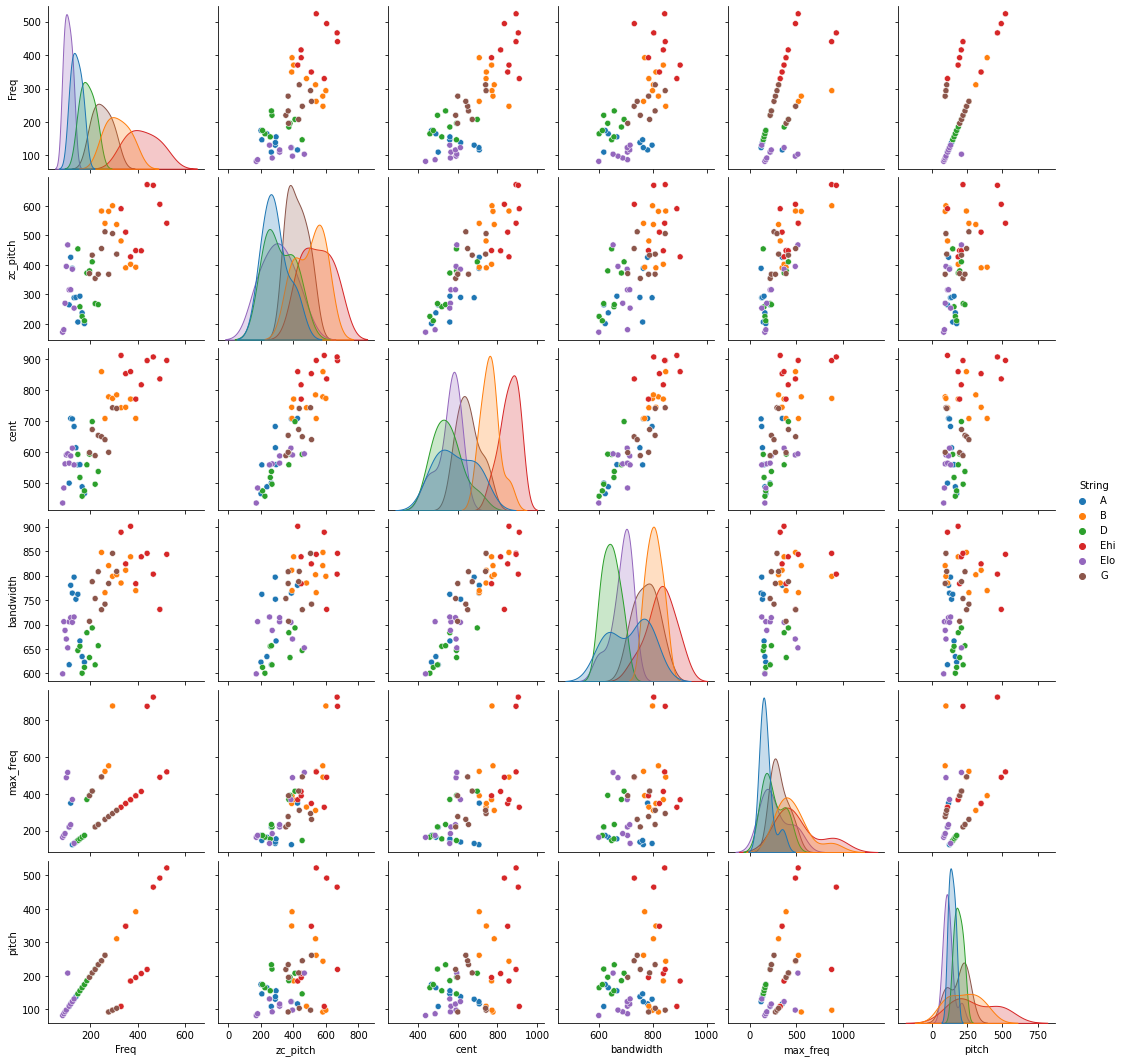

In [168]:
import seaborn as sns

df_plot = df_train[['Freq','zc_pitch', 'cent', 'bandwidth', 'max_freq', 'pitch', 'String']]
sns.pairplot(df_plot, hue='String');

## Atividade

Verificar com as metricas silhouette e ELbow o melhor agrupamento.

Depois de gerar o novo agrupamento com o melhor k, classificar as amostras que faltaram (``df_test``).

###Método Silhouette

In [169]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [170]:
X = df_train[['bandwidth']].values
range_n_clusters = [2, 3, 4, 5, 6, 7] 

For n_clusters = 2 The average silhouette_score is : 0.6317752917417979
For n_clusters = 3 The average silhouette_score is : 0.5639885624139123
For n_clusters = 4 The average silhouette_score is : 0.571801995808543
For n_clusters = 5 The average silhouette_score is : 0.5596940505603439
For n_clusters = 6 The average silhouette_score is : 0.5570987481757509
For n_clusters = 7 The average silhouette_score is : 0.5919043867718607


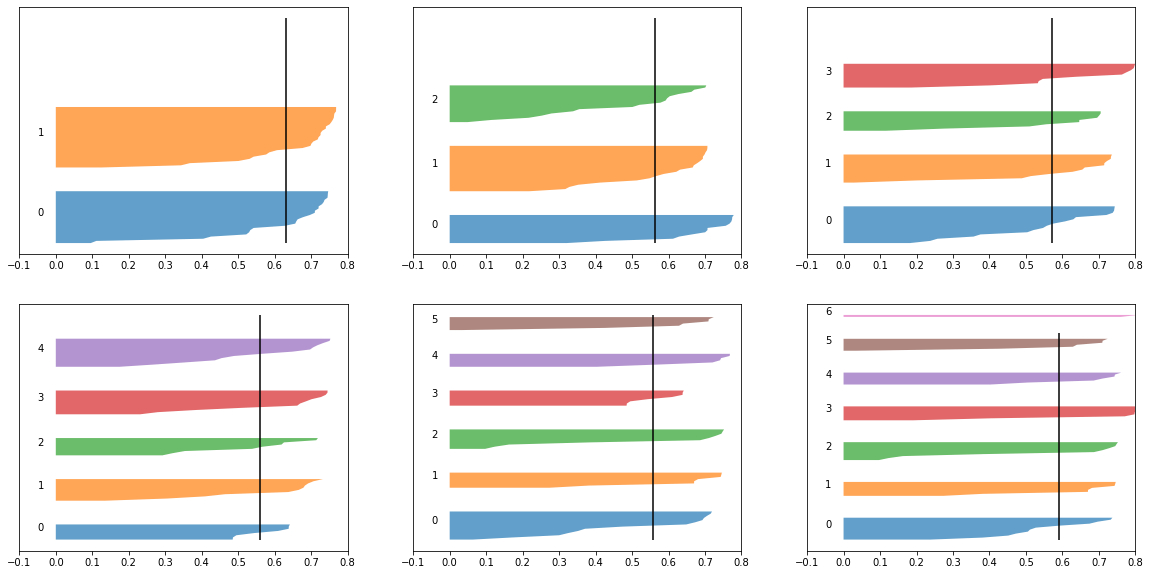

In [171]:
plt.figure(figsize=(20,10))

for j, n_clusters in enumerate(range_n_clusters):

    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    plt.subplot(2,3, j+1)
    plt.vlines(silhouette_avg , 0, len(sample_silhouette_values)+50)

    y_lower = 0
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        plt.xlim([-0.1, 0.8])
        plt.yticks([])
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples


plt.show()

###Método Elbow

In [172]:
def calculate_wcss(data, min_k, max_k):
  wcss = []
  for n in range(min_k, max_k):
    kmeans = KMeans(n_clusters = n, random_state = 1)
    kmeans.fit(X = data)
    wcss.append(kmeans.inertia_)
  
  return wcss

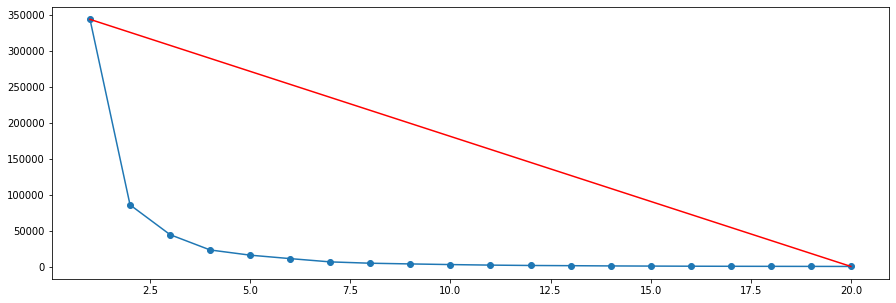

In [173]:
min_k = 1
max_k = 21

wcss = calculate_wcss(X, min_k = min_k, max_k = max_k)

plt.figure(figsize=(15,5))
plt.plot(range(min_k, len(wcss)+1), wcss, 'o-')
plt.plot([min_k, len(wcss)], [wcss[0], wcss[-1]], 'r')
plt.show()

In [174]:
def optimal_number_of_clusters(wcss):
  x1, y1 = 1, wcss[0]
  x2, y2 = len(wcss), wcss[-1]
  
  distances = []
  for i in range(1, len(wcss)+1):
    x0 = i
    y0 = wcss[i-1]
    numerator = np.abs((y2 - y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1 )
    denominator = np.sqrt( (y2 - y1)**2 + (x2-x1)**2)
    distances.append(numerator/denominator)
  return distances

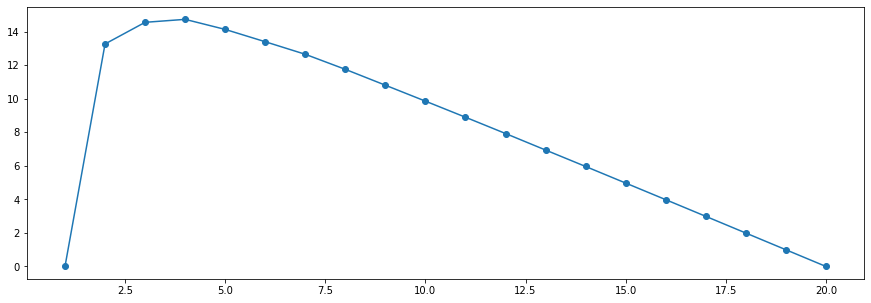

In [175]:
distances = optimal_number_of_clusters(wcss)

plt.figure(figsize=(15,5))
plt.plot(range(min_k, len(wcss)+1), distances, 'o-')
plt.show()

###Melhor *k* 

De acordo com os gráficos do Silhouette Score e do Elbow, foi observado que o melhor *k* é 4.

In [176]:
selected_k = 4

###Classificação das Amostras de `df_test`

####Preparação do `df_test`

In [177]:
df_test['Label'] = ""
df_test['String'] = ""
#df_test['Freq'] = ""

for index, row in df_test.iterrows():

    chord_freq = row['File'].split('.') 

    name = chord_freq[0]
    label = name[-2]+name[-1]+name[-5]
    string = name[-2]+name[-1]


    df_test['Label'].loc[index] = label
    df_test['String'].loc[index] = string
    #df_test['Freq'].loc[index] = notes_freqs[label]

#df_test['Freq'] = df_test['Freq'].astype(float)
df_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

File Label String
0  (Scale1) Do.wav   Do1     Do
1  (Scale2) Re.wav   Re2     Re
2  (Scale3) Mi.wav   Mi3     Mi
3  (Scale4) Fa.wav   Fa4     Fa
4  (Scale5) So.wav   So5     So
5  (Scale6) La.wav   La6     La
6  (Scale7) Ti.wav   Ti7     Ti
7  (Scale8) Do.wav   Do8     Do

In [178]:
x_test, sr_test = librosa.load(dir + '/' + df_test['File'][nota])
print(sr_test)
print(len(x_test)/sr)


# normalizando e removendo o offset
x_test = (x_test - np.mean(x_test))/np.std(x_test)
n = len(x_test)

22050
3.0882539682539685


In [179]:
#Adquirindo features
for newcol in ['N','sr','zc_pitch','cent','bandwidth','max_freq','pitch']:
    df_test[newcol] = 0.0

X_train_2 = []

for index, row in tqdm(df_test.iterrows()):
    y, sr = librosa.load(dir + '/' + row['File'])
    y = (y - np.mean(y))/np.std(y)
    n = len(y)

    zc_pitch, cent, bandwidth, max_freq, pitch = extract_features(y, sr, filter=True)

    df_test.loc[index, ['N']] = n
    df_test.loc[index, ['sr']] = sr
    df_test.loc[index,['zc_pitch']] = zc_pitch
    df_test.loc[index,['cent']] = cent
    df_test.loc[index,['bandwidth']] = bandwidth
    df_test.loc[index,['max_freq']] = max_freq
    df_test.loc[index,['pitch']] = pitch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [180]:
df_test

File Label String  ...   bandwidth    max_freq       pitch
0  (Scale1) Do.wav   Do1     Do  ...  705.523222  219.992898  109.759114
1  (Scale2) Re.wav   Re2     Re  ...  704.613183  369.299054  123.484405
2  (Scale3) Mi.wav   Mi3     Mi  ...  715.605836  130.494449  131.449417
3  (Scale4) Fa.wav   Fa4     Fa  ...  761.920623  146.234375  146.517368
4  (Scale5) So.wav   So5     So  ...  634.523659  164.083008  164.817953
5  (Scale6) La.wav   La6     La  ...  622.884679  173.513927  174.483370
6  (Scale7) Ti.wav   Ti7     Ti  ...  632.677896  392.039483  196.091268
7  (Scale8) Do.wav   Do8     Do  ...  617.514614  220.434686  220.403239

[8 rows x 10 columns]

####Classificação

In [181]:
df_test.head(1)

File Label String  ...   bandwidth    max_freq       pitch
0  (Scale1) Do.wav   Do1     Do  ...  705.523222  219.992898  109.759114

[1 rows x 10 columns]

In [182]:
df_test.columns

Index(['File', 'Label', 'String', 'N', 'sr', 'zc_pitch', 'cent', 'bandwidth',
       'max_freq', 'pitch'],
      dtype='object')

In [183]:
#from sklearn.cluster import KMeans

model_kmeans = KMeans(n_clusters = selected_k)

X = df_test[['N', 'sr', 'zc_pitch', 'cent', 'bandwidth','max_freq', 'pitch']].values
model_kmeans.fit(X)

y_model_kmeans = model_kmeans.predict(X)
y_model_kmeans

array([3, 3, 0, 1, 2, 2, 1, 2], dtype=int32)

In [184]:
import time

for arq in df_test['File'].values:
    ipd.display(ipd.Audio(dir + '/' + arq))